In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
import requests
import csv
data=pd.read_csv(r"C:\Users\merie\Desktop\advdata\Insurance\insuranceClaim.csv",delimiter=',',encoding='latin1')
print(data.head())
print (len(data))

   age  sex   bmi    steps  children  smoker  region      charges  \
0   19    0 27.90  3009.00         0       1       3     1.688.49   
1   18    1 33.77  3008.00         1       0       2     1.725.55   
2   28    1 33.00  3009.00         3       0       2    4,449,462   
3   33    1 22.70 10009.00         0       0       1  21984.47061   
4   32    1 28.88  8010.00         0       0       1    3866.8552   

   insuranceclaim   DateClaim  
0               1  12/12/2019  
1               1  12/12/2019  
2               0  12/12/2019  
3               0  12/12/2019  
4               1  12/12/2019  
1338


In [2]:
#data = train_set.copy()
data = data.copy()
print (data)

      age  sex   bmi    steps  children  smoker  region      charges  \
0      19    0 27.90  3009.00         0       1       3     1.688.49   
1      18    1 33.77  3008.00         1       0       2     1.725.55   
2      28    1 33.00  3009.00         3       0       2    4,449,462   
3      33    1 22.70 10009.00         0       0       1  21984.47061   
4      32    1 28.88  8010.00         0       0       1    3866.8552   
...   ...  ...   ...      ...       ...     ...     ...          ...   
1333   50    1 30.97  4008.00         3       0       1   10600.5483   
1334   18    0 31.92  3003.00         0       0       0    2205.9808   
1335   18    0 36.85  3008.00         0       0       2    1629.8335   
1336   21    0 25.80  8009.00         0       0       3     2007.945   
1337   61    0 29.07  8008.00         0       1       1   29141.3603   

      insuranceclaim   DateClaim  
0                  1  12/12/2019  
1                  1  12/12/2019  
2                  0  12/12/20

In [3]:
# from data.info() we can notice that charge is defined as object because it is considered as String in csv file because 
#the proesence of ","in the numbers 
data['charges'] = data['charges'].str.replace(',', '')

In [4]:
# after eliminating "," from charge feature,now we proceed to change the String to the FLoat errors='coerce'
data['charges'] = pd.to_numeric(data['charges'],errors ='coerce')

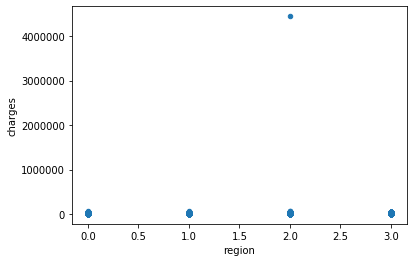

In [5]:
data.plot(kind="scatter", x="region", y="charges")

In [6]:
#we notice that our target has an outlier we should process to drop ir but since this outliers is the max value
#we should find out where is located this value 
np.argmax(data['charges'])

C:\Users\merie\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


2

In [7]:
# we will drop row # 2 as it is outlier
data.drop([2], inplace=True)

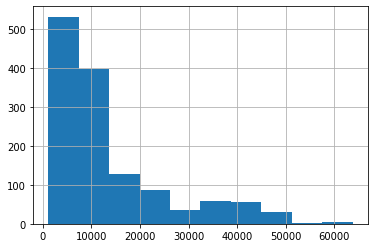

In [8]:
data['charges'].hist()

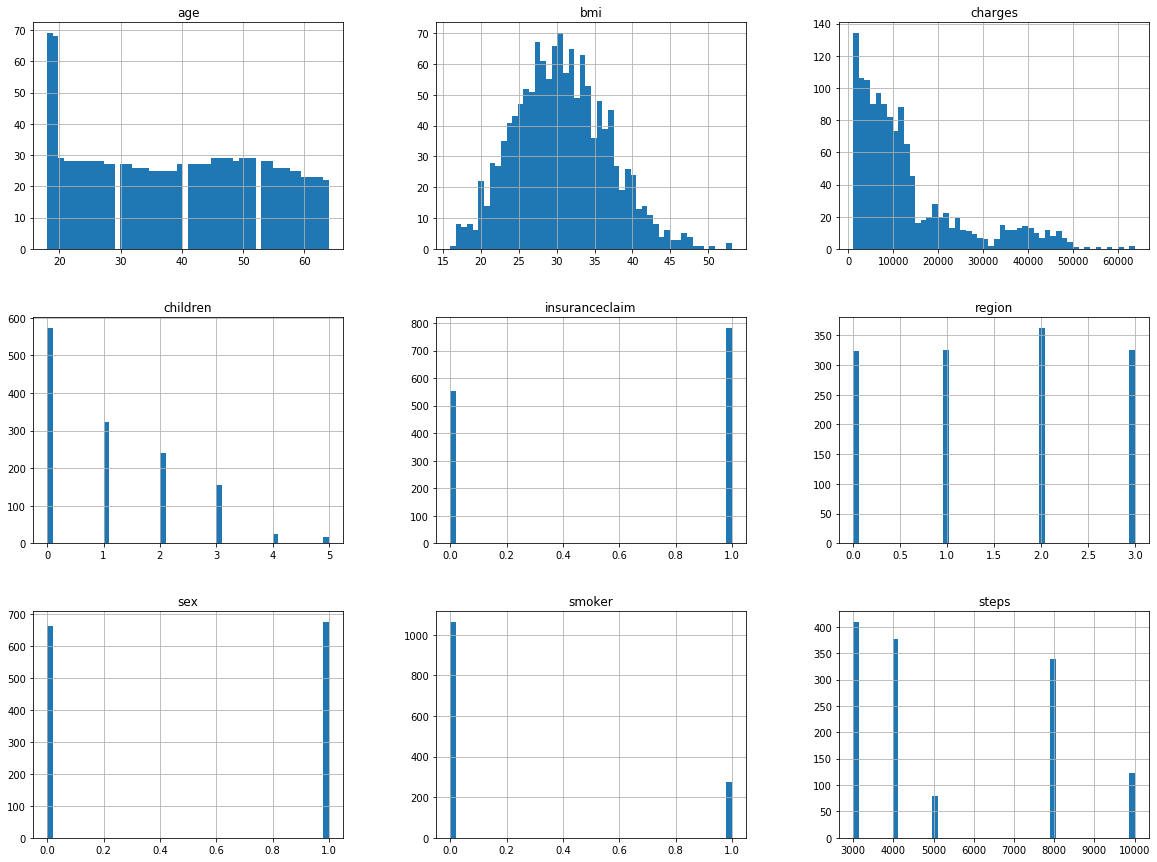

In [9]:
#A histogram for each numerical attribute
data.hist(bins=50, figsize=(20,15))
plt.show()


In [10]:
corr_matrix = data.corr()
print (data.corr())
corr_matrix["charges"].sort_values(ascending=False)


                 age   sex   bmi  steps  children  smoker  region  charges  \
age             1.00 -0.02  0.11  -0.17      0.04   -0.03    0.00     0.30   
sex            -0.02  1.00  0.05  -0.04      0.02    0.08    0.00     0.05   
bmi             0.11  0.05  1.00  -0.68      0.01    0.00    0.16     0.19   
steps          -0.17 -0.04 -0.68   1.00      0.06   -0.27   -0.07    -0.31   
children        0.04  0.02  0.01   0.06      1.00    0.01    0.02     0.07   
smoker         -0.03  0.08  0.00  -0.27      0.01    1.00   -0.00     0.79   
region          0.00  0.00  0.16  -0.07      0.02   -0.00    1.00    -0.01   
charges         0.30  0.05  0.19  -0.31      0.07    0.79   -0.01     1.00   
insuranceclaim  0.11  0.03  0.38  -0.43     -0.41    0.33    0.02     0.31   

                insuranceclaim  
age                       0.11  
sex                       0.03  
bmi                       0.38  
steps                    -0.43  
children                 -0.41  
smoker               

charges           1.00
smoker            0.79
insuranceclaim    0.31
age               0.30
bmi               0.19
children          0.07
sex               0.05
region           -0.01
steps            -0.31
Name: charges, dtype: float64

In [11]:
 #import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy="median")
data_num = data.drop(['region','DateClaim'], axis=1)
X = imputer.fit_transform(data_num)

In [12]:
#convert the numpy array to a Dataframe
data_tr1 = pd.DataFrame(X,columns=['age', 'sex',    'bmi',   'steps',  'children', 'smoker', 'charges' ,'insuranceclaim' ])
print(data_tr1.head())

    age  sex   bmi    steps  children  smoker  charges  insuranceclaim
0 19.00 0.00 27.90  3009.00      0.00    1.00  9377.90            1.00
1 18.00 1.00 33.77  3008.00      1.00    0.00  9377.90            1.00
2 33.00 1.00 22.70 10009.00      0.00    0.00 21984.47            0.00
3 32.00 1.00 28.88  8010.00      0.00    0.00  3866.86            1.00
4 31.00 0.00 25.74  8005.00      0.00    0.00  3756.62            0.00


In [13]:
#we need to change region name to a number 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_cat = data["region"]
data_cat_encoded = le.fit_transform(data_cat)
data_cat_encoded

array([3, 2, 1, ..., 2, 3, 1], dtype=int64)

In [14]:
data_tr2 = pd.DataFrame(data_cat_encoded,columns=['region'] )


In [15]:
data_prepared=pd.concat([ data_tr1,data_tr2],axis=1)
data_prepared1=data_prepared
print (data_prepared)

       age  sex   bmi    steps  children  smoker  charges  insuranceclaim  \
0    19.00 0.00 27.90  3009.00      0.00    1.00  9377.90            1.00   
1    18.00 1.00 33.77  3008.00      1.00    0.00  9377.90            1.00   
2    33.00 1.00 22.70 10009.00      0.00    0.00 21984.47            0.00   
3    32.00 1.00 28.88  8010.00      0.00    0.00  3866.86            1.00   
4    31.00 0.00 25.74  8005.00      0.00    0.00  3756.62            0.00   
...    ...  ...   ...      ...       ...     ...      ...             ...   
1332 50.00 1.00 30.97  4008.00      3.00    0.00 10600.55            0.00   
1333 18.00 0.00 31.92  3003.00      0.00    0.00  2205.98            1.00   
1334 18.00 0.00 36.85  3008.00      0.00    0.00  1629.83            1.00   
1335 21.00 0.00 25.80  8009.00      0.00    0.00  2007.94            0.00   
1336 61.00 0.00 29.07  8008.00      0.00    1.00 29141.36            1.00   

      region  
0          3  
1          2  
2          1  
3          1  


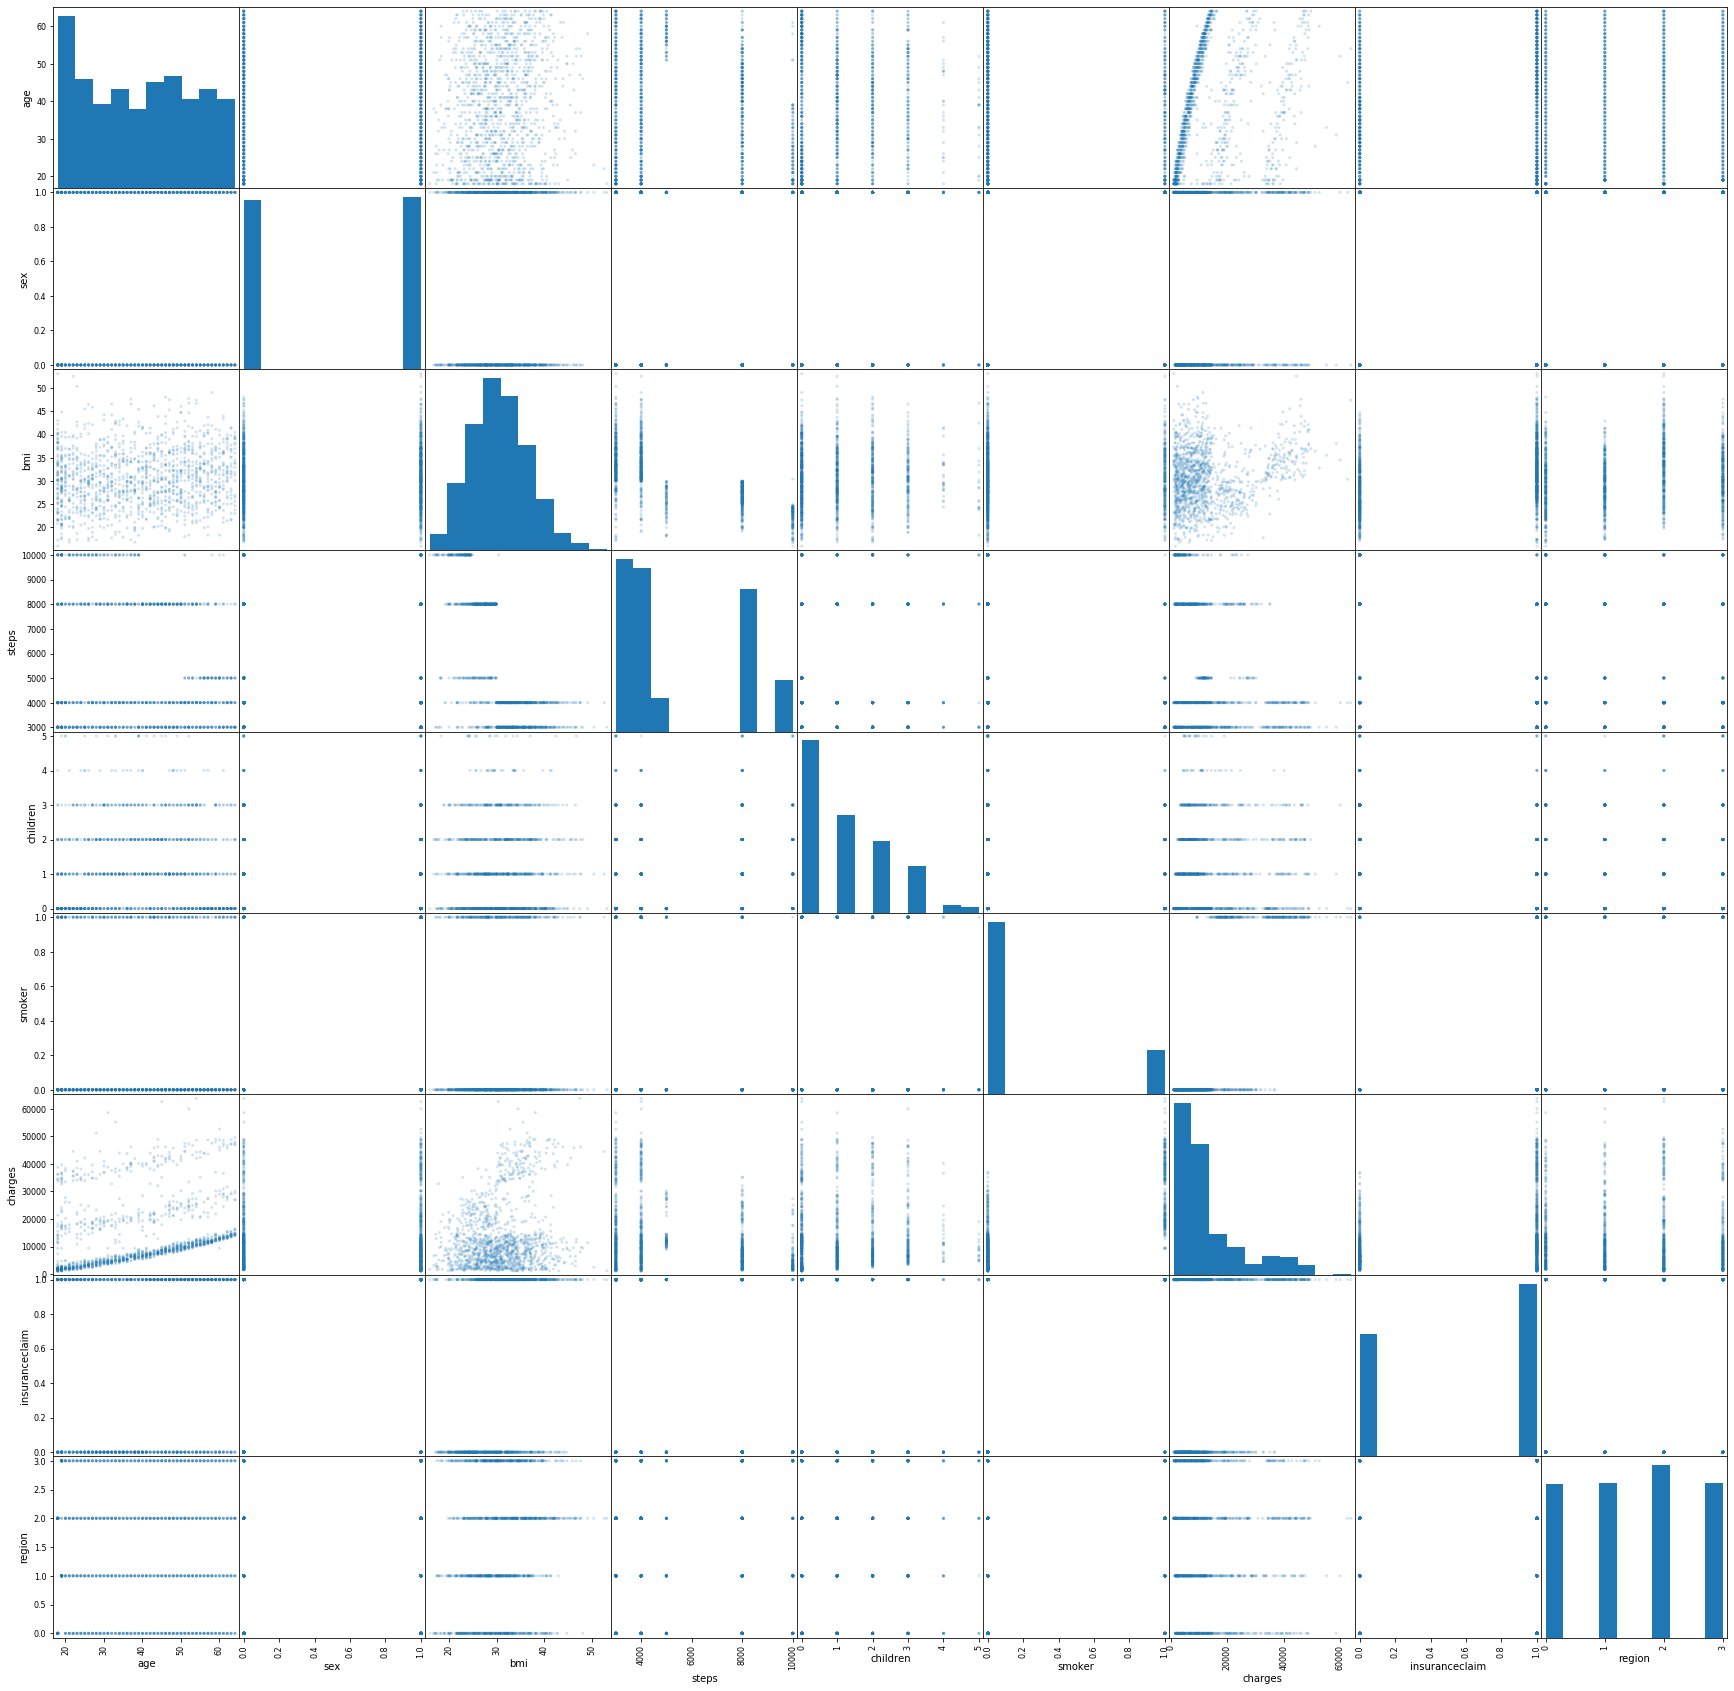

In [16]:
from pandas.plotting import scatter_matrix

pd.plotting.scatter_matrix(data_prepared, alpha=0.2, figsize=(30, 30))
plt.show()


In [17]:
# we need to check our target and which one of its transformations is the most accurate 
data_prepared["charges_log"] = np.log(data_prepared["charges"])
data_prepared["charges_sqrt"] = np.sqrt(data_prepared["charges"])
data_prepared["charges_cbrt"] = np.cbrt(data_prepared["charges"])
print (data_prepared)


       age  sex   bmi    steps  children  smoker  charges  insuranceclaim  \
0    19.00 0.00 27.90  3009.00      0.00    1.00  9377.90            1.00   
1    18.00 1.00 33.77  3008.00      1.00    0.00  9377.90            1.00   
2    33.00 1.00 22.70 10009.00      0.00    0.00 21984.47            0.00   
3    32.00 1.00 28.88  8010.00      0.00    0.00  3866.86            1.00   
4    31.00 0.00 25.74  8005.00      0.00    0.00  3756.62            0.00   
...    ...  ...   ...      ...       ...     ...      ...             ...   
1332 50.00 1.00 30.97  4008.00      3.00    0.00 10600.55            0.00   
1333 18.00 0.00 31.92  3003.00      0.00    0.00  2205.98            1.00   
1334 18.00 0.00 36.85  3008.00      0.00    0.00  1629.83            1.00   
1335 21.00 0.00 25.80  8009.00      0.00    0.00  2007.94            0.00   
1336 61.00 0.00 29.07  8008.00      0.00    1.00 29141.36            1.00   

      region  charges_log  charges_sqrt  charges_cbrt  
0          3       

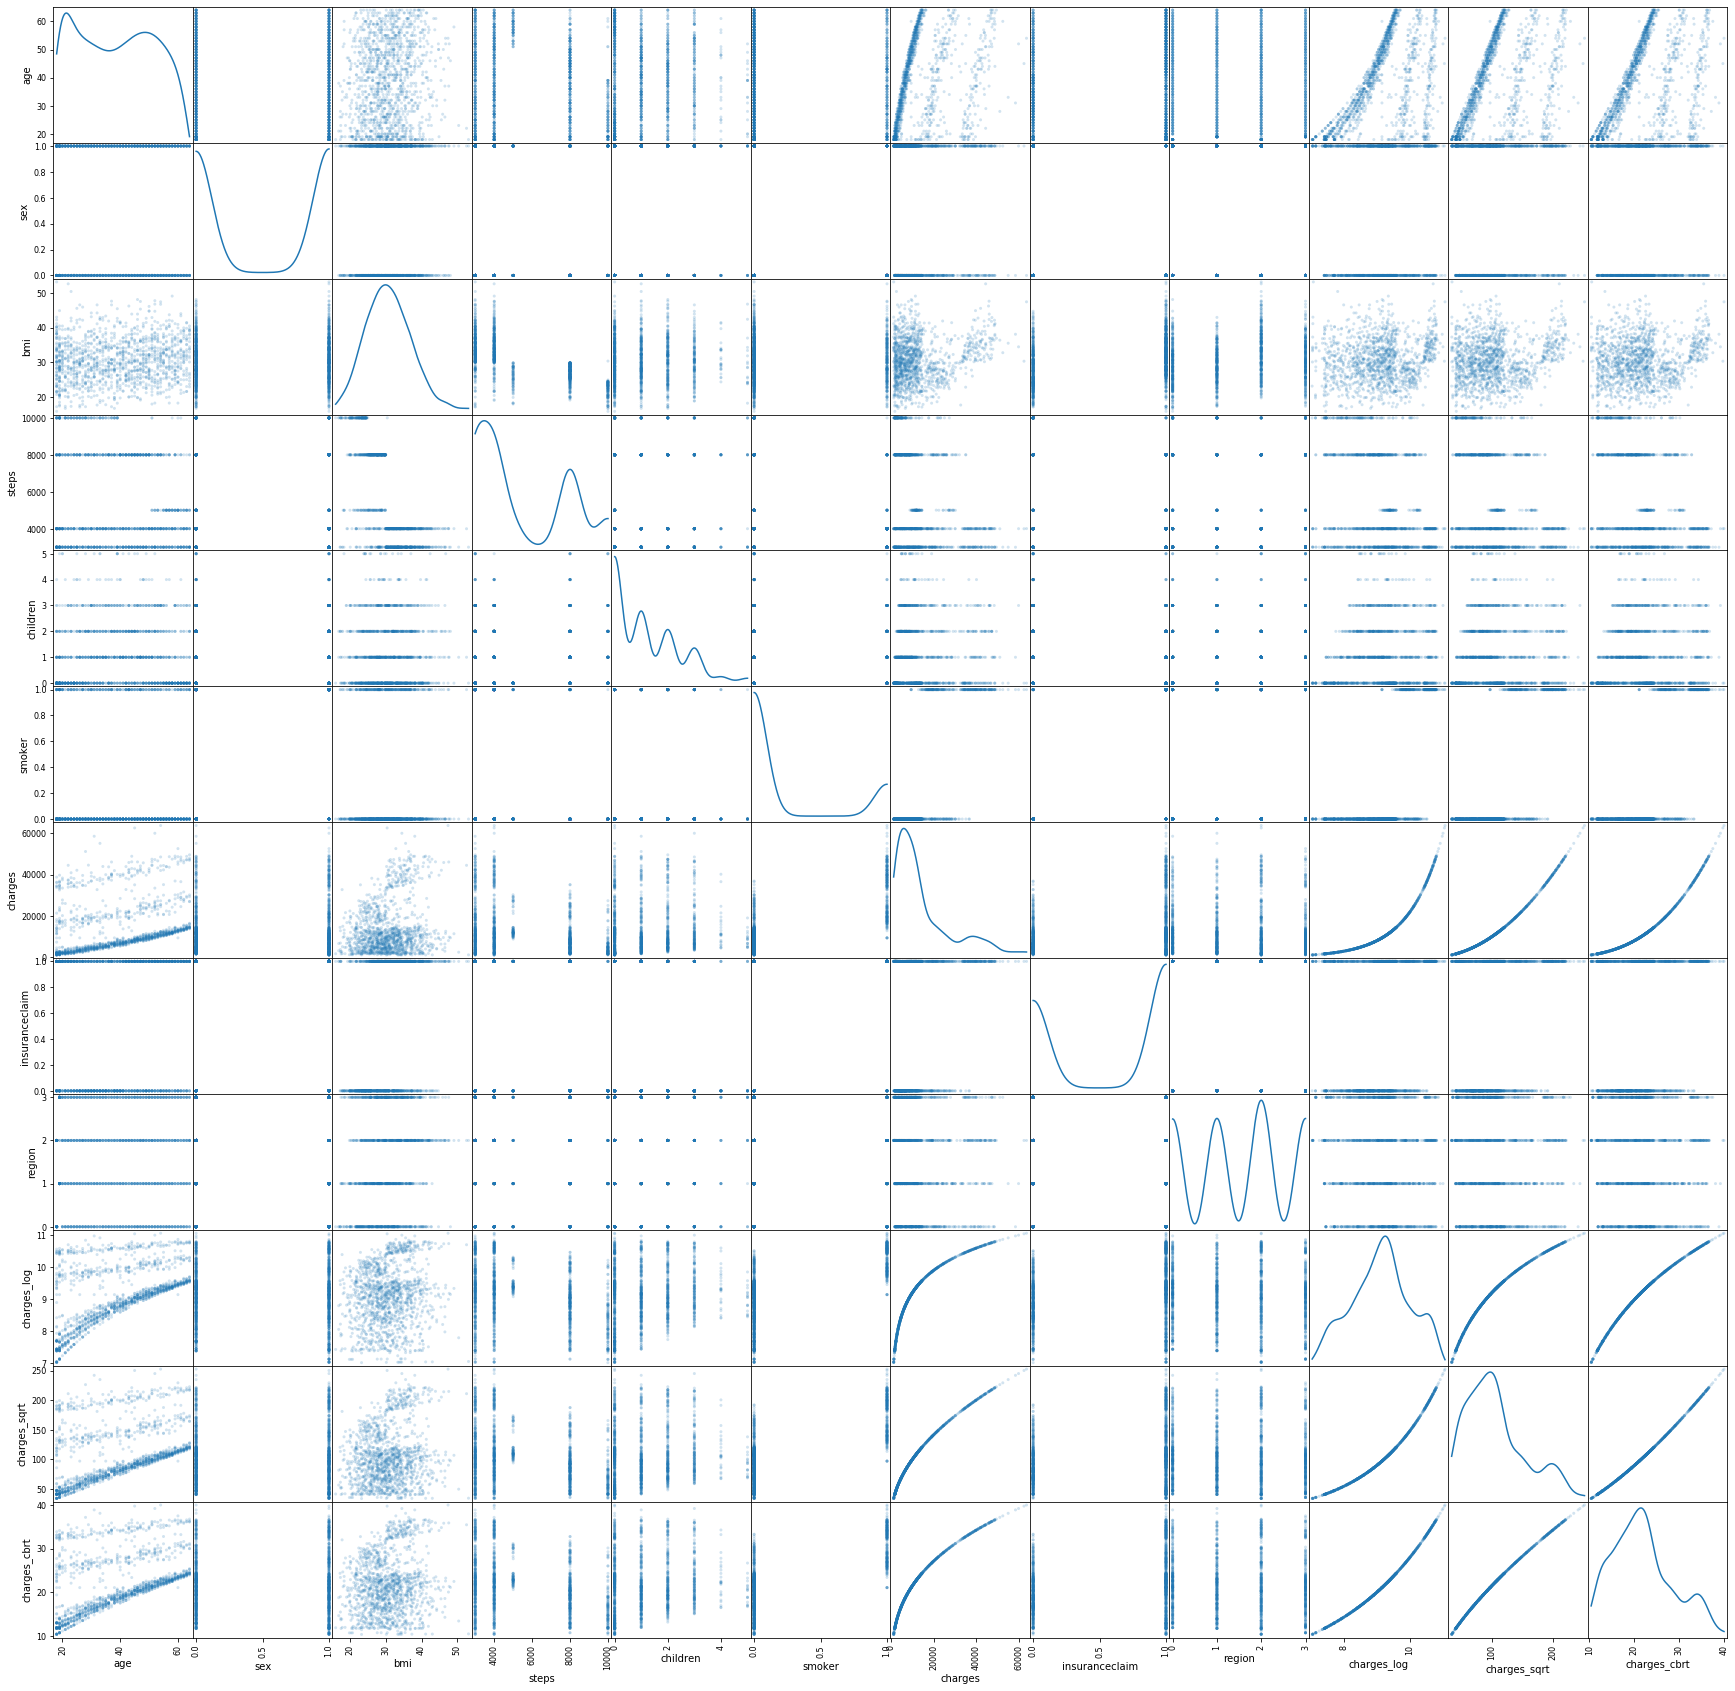

In [18]:
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(data_prepared,alpha=0.2, figsize=(30, 30), diagonal='kde')
plt.show()


In [19]:
data_prepared.corr()

,age,sex,bmi,steps,children,smoker,charges,insuranceclaim,region,charges_log,charges_sqrt,charges_cbrt
age,1.00,-0.02,0.11,-0.17,0.04,-0.03,0.30,0.11,0.00,0.53,0.41,0.45
sex,-0.02,1.00,0.05,-0.04,0.02,0.08,0.05,0.03,0.00,0.00,0.03,0.03
bmi,0.11,0.05,1.00,-0.68,0.01,0.00,0.19,0.38,0.16,0.13,0.16,0.15
steps,-0.17,-0.04,-0.68,1.00,0.06,-0.27,-0.30,-0.42,-0.07,-0.31,-0.32,-0.32
children,0.04,0.02,0.01,0.06,1.00,0.01,0.07,-0.41,0.02,0.16,0.11,0.13
smoker,-0.03,0.08,0.00,-0.27,0.01,1.00,0.78,0.33,-0.00,0.66,0.75,0.72
charges,0.30,0.05,0.19,-0.30,0.07,0.78,1.00,0.31,-0.01,0.89,0.98,0.96
insuranceclaim,0.11,0.03,0.38,-0.42,-0.41,0.33,0.31,1.00,0.02,0.23,0.28,0.27
region,0.00,0.00,0.16,-0.07,0.02,-0.00,-0.01,0.02,1.00,-0.04,-0.03,-0.03
charges_log,0.53,0.00,0.13,-0.31,0.16,0.66,0.89,0.23,-0.04,1.00,0.97,0.98


# Y prediction

Y  is charge feature that we want to predict
As mention in the distribution above we can drop the sex feature since there is no correlation with our target charge_log

I have choose Charge_log  to predict instead Charge because as we can notice on the two graph below the distribution of
Charge_log is more uniform than charge which will be very helpful for our calculaiton 

In [21]:
from sklearn.model_selection import train_test_split
#X=data_prepared[['age', 'sex' , 'bmi' ,    'steps',  'children',  'smoker',  'insuranceclaim' ]]
X=data_prepared[['age' , 'bmi' ,    'steps',  'children',  'smoker',  'insuranceclaim' ]]
print (X)
y=data_prepared['charges_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape)
print  ( y_train.shape)
print (X_test.shape)
print ( y_test.shape)

       age   bmi    steps  children  smoker  insuranceclaim
0    19.00 27.90  3009.00      0.00    1.00            1.00
1    18.00 33.77  3008.00      1.00    0.00            1.00
2    33.00 22.70 10009.00      0.00    0.00            0.00
3    32.00 28.88  8010.00      0.00    0.00            1.00
4    31.00 25.74  8005.00      0.00    0.00            0.00
...    ...   ...      ...       ...     ...             ...
1332 50.00 30.97  4008.00      3.00    0.00            0.00
1333 18.00 31.92  3003.00      0.00    0.00            1.00
1334 18.00 36.85  3008.00      0.00    0.00            1.00
1335 21.00 25.80  8009.00      0.00    0.00            0.00
1336 61.00 29.07  8008.00      0.00    1.00            1.00

[1337 rows x 6 columns]
(1069, 6)
(1069,)
(268, 6)
(268,)


skew:  1.5313069302989393
kurtosis:  1.6743011804676753
63770.42801


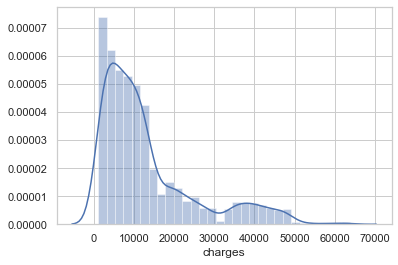

In [23]:
from scipy.stats import kurtosis, skew, stats
print("skew:  {}".format(skew(data_prepared['charges'])))
print("kurtosis:  {}".format(kurtosis(data_prepared['charges'])))
print (max(data_prepared['charges']))
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)
fig_dims = (20, 10)
#f, axes = plt.subplots(figsize=fig_dims)
sns.distplot(data_prepared['charges'])
#sns.distplot(data_prepared['charges'],ax=axes[0])
plt.show()

skew:  -0.10743145184079264
kurtosis:  -0.560340415930499


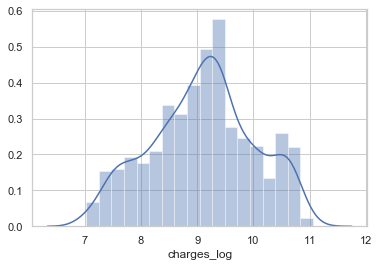

In [24]:
print("skew:  {}".format(skew(y_train)))
print("kurtosis:  {}".format(kurtosis(y_train)))
sns.distplot(data_prepared.charges_log)
plt.show()

# Model 1 : KNN


I will be using Knn with at the begining with the default value ( I don't specify the number of  neighbor)

In [25]:
#reg = KNeighborsRegressor(n_neighbors)
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor()
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [26]:
# Cross Validatoion 
from sklearn.model_selection import cross_val_score
reg = KNeighborsRegressor()
reg.fit(X_train, y_train)
scores = cross_val_score(reg, X, y, cv=5)
scores

array([0.3345829 , 0.39231728, 0.44118122, 0.40161904, 0.18819192])

In [27]:
print("The average score of the model is ", np.average(scores))

The average score of the model is  0.3515784724960356


In [28]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, reg.predict(X_test))
mse = metrics.mean_squared_error(y_test, reg.predict(X_test))
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test,reg.predict(X_test))

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)


Results of sklearn.metrics:
MAE: 0.5567471364461524
MSE: 0.6321350992868316
RMSE: 0.7950692418191209
R-Squared: 0.30367641445295046


In [29]:
print("Accuracy on training set: {:.3f}".format(reg.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(reg.score(X_test, y_test)))


Accuracy on training set: 0.558
Accuracy on test set: 0.304


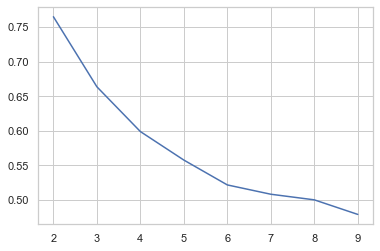

In [30]:
# we apply this funtion to find out which number of neighbor will be the most accurate 
scores = []
for n in range(2,10):
    reg = KNeighborsRegressor(n_neighbors=n)
    reg.fit(X_train, y_train)
    scores.append(reg.score(X_train, y_train))
    #print(KNeighborsRegressor.predict(X_test)) 
plt.plot(range(2,10), scores)
plt.show()

From the graph above we can notice that when n_neighbors=2 is the most accurate compares to n=9 which is very low 
I will proceed to test  that through cross validation 

In [31]:
# Cross Validatoion 
from sklearn.model_selection import cross_val_score
reg2 = KNeighborsRegressor(n_neighbors=2)
reg2.fit(X_train, y_train)
scores = cross_val_score(reg2, X, y, cv=5)
scores

array([0.18683652, 0.39331655, 0.24242943, 0.32755684, 0.11105852])

In [32]:
print("The average score of the model is ", np.average(scores))

The average score of the model is  0.25223957208407577


In [33]:
from sklearn import metrics
reg2 = KNeighborsRegressor(n_neighbors=2)
reg2.fit(X_train, y_train)
mae = metrics.mean_absolute_error(y_test, reg2.predict(X_test))
mse = metrics.mean_squared_error(y_test, reg2.predict(X_test))
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test,reg2.predict(X_test))

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)


Results of sklearn.metrics:
MAE: 0.5732911531239551
MSE: 0.7664602064641051
RMSE: 0.8754771307487735
R-Squared: 0.15571161964216618


In [34]:
print("Accuracy on training set: {:.3f}".format(reg2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(reg2.score(X_test, y_test)))


Accuracy on training set: 0.765
Accuracy on test set: 0.156


we can notice that with n_neighbor , the model performs well on the training data but performs poorly on the test data.

In [35]:
# Cross Validatoion 
from sklearn.model_selection import cross_val_score
reg9 = KNeighborsRegressor(n_neighbors=9)
reg9.fit(X_train, y_train)
scores = cross_val_score(reg, X, y, cv=5)
scores

array([0.35664663, 0.39418647, 0.45045405, 0.37217855, 0.20410603])

In [36]:
from sklearn import metrics
reg9 = KNeighborsRegressor(n_neighbors=9)
reg9.fit(X_train, y_train)
mae = metrics.mean_absolute_error(y_test, reg9.predict(X_test))
mse = metrics.mean_squared_error(y_test, reg9.predict(X_test))
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test,reg9.predict(X_test))
print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.5695696627268504
MSE: 0.6390993632516582
RMSE: 0.7994369038589964
R-Squared: 0.29600498272869546


In [37]:
print("Accuracy on training set: {:.3f}".format(reg9.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(reg9.score(X_test, y_test)))


Accuracy on training set: 0.479
Accuracy on test set: 0.296


From the above results we can notice that with n_neighbor=9 the model is not that accurate on the training set but it is better on test set compares to n_neighbor=2 but still the score is very low 

### This score is very low, We will try different model. 

# Model 2 :Random Forest Regressor

let us begin with the default parameter of n_estimators

In [38]:
#from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
#linear_reg = LinearRegression().fit(X_train, y_train)
#print("Accuracy on training set: {:.3f}".format(linear_reg.score(X_train, y_train)))
#print("Accuracy on test set: {:.3f}".format(linear_reg.score(X_test, y_test)))


C:\Users\merie\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [39]:
# Cross Validatoion 
from sklearn.model_selection import cross_val_score
Random = RandomForestRegressor()
Random.fit(X_train, y_train)
scores = cross_val_score(Random, X, y, cv=5)
scores

C:\Users\merie\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.79782955, 0.67535233, 0.83761051, 0.79073249, 0.7478776 ])

In [40]:
print("The average score of the model is ", np.average(scores))

The average score of the model is  0.7698804992023672


In [41]:
from sklearn import metrics
Random = RandomForestRegressor()
Random.fit(X_train, y_train)
mae = metrics.mean_absolute_error(y_test, Random.predict(X_test))
mse = metrics.mean_squared_error(y_test, Random.predict(X_test))
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test,Random.predict(X_test))

print("Results of RandomForestRegressor.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of RandomForestRegressor.metrics:
MAE: 0.24366380318962713
MSE: 0.1789916031185106
RMSE: 0.4230739924865514
R-Squared: 0.8028331680887378


C:\Users\merie\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [42]:
print("Accuracy on training set: {:.3f}".format(Random.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(Random.score(X_test, y_test)))


Accuracy on training set: 0.957
Accuracy on test set: 0.803


with Random Forest Regressor with default value , we can notice that comparing to the previous model Knn, this one is more accurate with 0.959 on the trainig set and test set with 0.803

let's run this model with another estimator but forst we need to do a function which allowas us to plot the most acurate estimator on the training set 

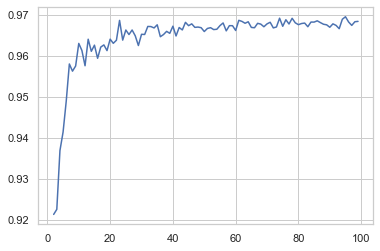

In [43]:
from sklearn.ensemble import RandomForestRegressor

scores = []
for n in range(2,100):
    reg = RandomForestRegressor(n_estimators=n)
    reg.fit(X_train, y_train)
    scores.append(reg.score(X_train, y_train))
    #print(KNeighborsRegressor.predict(X_test)) 

plt.plot(range(2,100), scores)
plt.show()

In [44]:
# Cross Validatoion 
from sklearn.model_selection import cross_val_score
Random5 = RandomForestRegressor(n_estimators=5, random_state=2, max_features=6)
Random5.fit(X_train, y_train)
scores = cross_val_score(Random, X, y, cv=5)
scores


array([0.75455691, 0.68587615, 0.83851996, 0.78084   , 0.72479894])

In [45]:
print("The average score of the model is ", np.average(scores))

The average score of the model is  0.7569183932355754


In [46]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, Random5.predict(X_test))
mse = metrics.mean_squared_error(y_test, Random5.predict(X_test))
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test,Random5.predict(X_test))

print("Results of RandomForestRegressor .metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of RandomForestRegressor .metrics:
MAE: 0.22516716835739972
MSE: 0.15946758594088462
RMSE: 0.3993339278609878
R-Squared: 0.8243396999373007


In [47]:
print("Accuracy on training set: {:.3f}".format(Random5.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(Random5.score(X_test, y_test)))


Accuracy on training set: 0.947
Accuracy on test set: 0.824


from the previous graph we can notice that from the point 20 of n_estimators=n, all the entry have almost the same accurancy ont the training set 
let's detail more and compare with n_estimators=5


In [48]:
# Cross Validatoion 
from sklearn.model_selection import cross_val_score
Random20 = RandomForestRegressor(n_estimators=20, random_state=2, max_features=6)
Random20.fit(X_train, y_train)
scores = cross_val_score(Random, X, y, cv=5)
scores


array([0.75000565, 0.68584991, 0.82153504, 0.79694556, 0.74908342])

In [49]:
print("The average score of the model is ", np.average(scores))

The average score of the model is  0.7606839145279028


In [50]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, Random20.predict(X_test))
mse = metrics.mean_squared_error(y_test, Random20.predict(X_test))
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test,Random20.predict(X_test))

print("Results of RandomForestRegressor .metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of RandomForestRegressor .metrics:
MAE: 0.22770206390980402
MSE: 0.15846752230731975
RMSE: 0.3980797938947916
R-Squared: 0.8254413123867356


In [51]:
print("Accuracy on training set: {:.3f}".format(Random20.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(Random20.score(X_test, y_test)))


Accuracy on training set: 0.966
Accuracy on test set: 0.825


from the two previous result of the defalut n_estimators and n_estimators=5, we can notice that n_estimators=20 is a little bit more accurate and compares to the previous model KNN, we notice that on the RandomForestRegressor the score is higher and more accurate

but let"s run the linear regression and compare it with RandomForestRegressor

# Model 3:  Linear Regression:

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
lr = LinearRegression().fit(X_train, y_train)
lr.intercept_ 

7.059440304718045

In [53]:
lr.coef_ 

array([ 3.49306092e-02,  9.83015471e-03, -2.44708735e-06,  8.85599812e-02,
        1.52265567e+00, -6.07495701e-02])

In [54]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr, X, y, cv=6) 
print("cv_scores:{}".format(cv_scores))
print("The average score of the model is ", np.average(cv_scores))

cv_scores:[0.7397825  0.7132968  0.74952669 0.83503682 0.72713164 0.72720464]
The average score of the model is  0.7486631819025776


In [55]:
y_predit= lr.predict(X_test)

In [56]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, lr.predict(X_test))
mse = metrics.mean_squared_error(y_test, lr.predict(X_test))
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test,lr.predict(X_test))

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)


Results of sklearn.metrics:
MAE: 0.292425546775667
MSE: 0.21170608269053112
RMSE: 0.46011529282401725
R-Squared: 0.7667967832390513


In [57]:
print("Accuracy on training set: {:.3f}".format(lr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lr.score(X_test, y_test)))


Accuracy on training set: 0.749
Accuracy on test set: 0.767


# Linear regression perfoms good but not that well than Random Forest Regressor,So Random Forest Regressor still the best model for this dataset